# KNN: Predict House Prices using KNN

## Task
Use KNN to predict house prices based on features like location, number of rooms, and square footage.

## Objective
To demonstrate how KNN can be used for regression tasks and to predict continuous values like house prices.

## Implementation
We use a housing dataset and apply KNN regression, tuning the number of neighbors (`k`) to optimize performance.


In [1]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Simulate a housing dataset (in practice, you'd use real housing data)
X, y = make_regression(n_samples=500, n_features=5, noise=0.4)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor
knn = KNeighborsRegressor()

# Perform grid search to find the best 'k'
param_grid = {'n_neighbors': np.arange(1, 21)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = knn_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Optimal 'k': {knn_cv.best_params_}")
print(f"Test MSE: {mse}")


Optimal 'k': {'n_neighbors': 5}
Test MSE: 1646.0789704775327


## K-Means: Customer Segmentation

## Task
Use K-Means clustering to segment customers based on purchasing behavior.

## Objective
Understand how to group customers into different segments for personalized marketing strategies.

## Implementation
We use customer purchasing data and apply K-Means clustering to segment them into different groups.


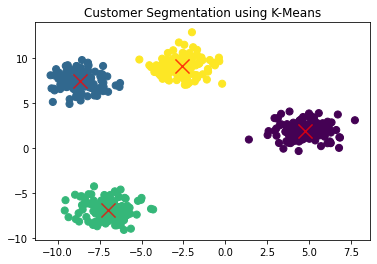

In [2]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Simulate customer data (in practice, you'd use real customer purchase data)
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('Customer Segmentation using K-Means')
plt.show()


## KNN: KNN for Recommender Systems

## Task
Build a simple recommendation system using KNN to suggest movies based on user ratings.

## Objective
To show how KNN can be applied in collaborative filtering for recommendation engines.

## Implementation
We use user rating data and apply KNN to recommend similar movies.


In [3]:

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Simulated movie ratings data
# Rows represent users, columns represent movies, values are ratings
ratings = np.array([
    [5, 4, 0, 0, 3],
    [4, 5, 0, 2, 0],
    [0, 0, 5, 4, 0],
    [0, 3, 4, 5, 1],
    [3, 0, 0, 4, 5]
])

# Apply KNN to find similar users/movies
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(ratings.T)

# Find the top 2 most similar movies to movie 0 (index 0)
distances, indices = knn.kneighbors(ratings.T[0].reshape(1, -1), n_neighbors=2)
print(f"Movies most similar to Movie 0: {indices.flatten()}")


Movies most similar to Movie 0: [0 1]


## K-Means: Anomaly Detection with K-Means

## Task
Use K-Means clustering to detect anomalies (e.g., fraud detection) in transactional data.

## Objective
Understand how K-Means can identify outliers and anomalies in datasets.

## Implementation
We use K-Means to identify anomalies in a dataset by checking how far points are from their cluster centroids.


c:\Users\91771\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


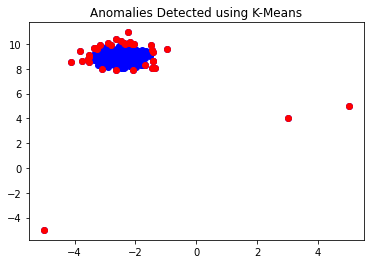

In [4]:

from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data with outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
X = np.vstack([X, np.array([[5, 5], [-5, -5], [3, 4]])])  # Add outliers

# Apply K-Means with 1 cluster
kmeans = KMeans(n_clusters=1, random_state=42)
kmeans.fit(X)
distances = kmeans.transform(X).flatten()

# Define an anomaly threshold (distance from centroid)
threshold = 1.0
anomalies = X[distances > threshold]

# Plot results
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red')
plt.title('Anomalies Detected using K-Means')
plt.show()
